<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Зависимость-целевого-признака" data-toc-modified-id="Зависимость-целевого-признака-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Зависимость целевого признака</a></span></li><li><span><a href="#Выделение-целевого-признака" data-toc-modified-id="Выделение-целевого-признака-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выделение целевого признака</a></span></li><li><span><a href="#Определение-тренировочной-выборки" data-toc-modified-id="Определение-тренировочной-выборки-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Определение тренировочной выборки</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Описание данных** <br/>
Набор данных находится в файле /datasets/insurance.csv.<br/>
Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.<br/>
Целевой признак: количество страховых выплат клиенту за последние 5 лет.<br/>

## Загрузка данных

### Загрузка библиотек

In [161]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
RANDOM_STATE = 12345

### Загрузка данных

In [162]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('/Users/vadimprimakov/Documents/Yandex_practicum/CSV/12_personal_data_security.csv')
    
display(data.head()) 

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.00,49600.00,1,0
1,0,46.00,38000.00,1,1
2,0,29.00,21000.00,0,0
3,0,21.00,41700.00,2,0
4,1,28.00,26100.00,0,0


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [164]:
display(data.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Пол,5000.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00
Возраст,5000.00,30.95,8.44,18.00,24.00,30.00,37.00,65.00
Зарплата,5000.00,39916.36,9900.08,5300.00,33300.00,40200.00,46600.00,79000.00
Члены семьи,5000.00,1.19,1.09,0.00,0.00,1.00,2.00,6.00
Страховые выплаты,5000.00,0.15,0.46,0.00,0.00,0.00,0.00,5.00


In [165]:
display(data.duplicated().sum())

153

In [166]:
data = data.drop_duplicates()

In [167]:
display(data.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Пол,4847.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00
Возраст,4847.00,31.02,8.49,18.00,24.00,30.00,37.00,65.00
Зарплата,4847.00,39895.81,9972.95,5300.00,33200.00,40200.00,46600.00,79000.00
Члены семьи,4847.00,1.20,1.10,0.00,0.00,1.00,2.00,6.00
Страховые выплаты,4847.00,0.15,0.47,0.00,0.00,0.00,0.00,5.00


In [168]:
print('Количество пропусков в каждом столбце')    
print(data.isna().mean())

Количество пропусков в каждом столбце
Пол                 0.00
Возраст             0.00
Зарплата            0.00
Члены семьи         0.00
Страховые выплаты   0.00
dtype: float64


In [169]:
data['Возраст'] = data['Возраст'].astype('int')
data['Зарплата'] = data['Зарплата'].astype('int')

In [170]:
data['Пол'] = pd.to_numeric(data['Пол'], downcast='integer')
data['Возраст'] = pd.to_numeric(data['Возраст'], downcast='integer')
data['Зарплата'] = pd.to_numeric(data['Зарплата'], downcast='integer')
data['Члены семьи'] = pd.to_numeric(data['Члены семьи'], downcast='integer')
data['Страховые выплаты'] = pd.to_numeric(data['Страховые выплаты'], downcast='integer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int8 
 1   Возраст            4847 non-null   int8 
 2   Зарплата           4847 non-null   int32
 3   Члены семьи        4847 non-null   int8 
 4   Страховые выплаты  4847 non-null   int8 
dtypes: int32(1), int8(4)
memory usage: 75.7 KB


     count  percent
Пол                
0     2431    50.15
1     2416    49.85


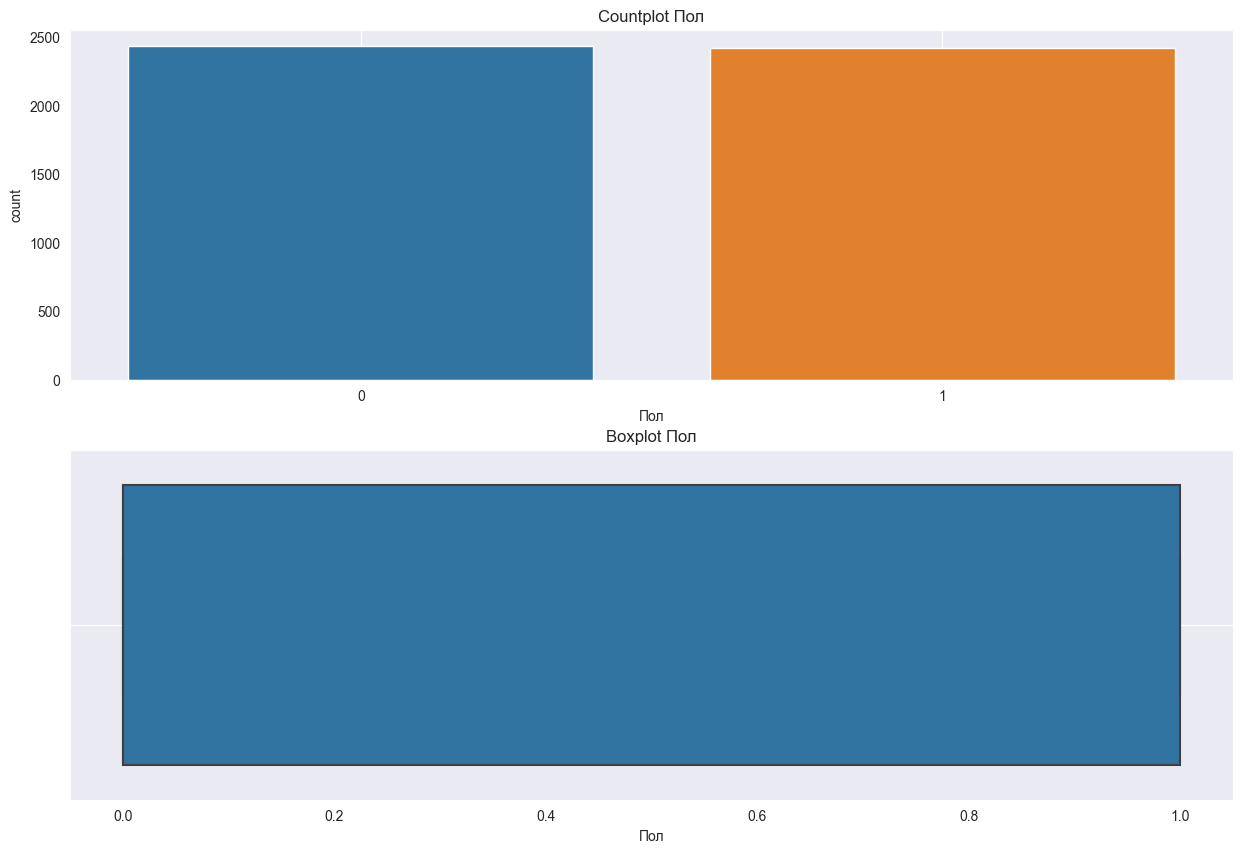

         count  percent
Возраст                
19         213     4.39
25         205     4.23
31         202     4.17
27         201     4.15
22         201     4.15
26         201     4.15
28         196     4.04
32         196     4.04
30         196     4.04
29         196     4.04


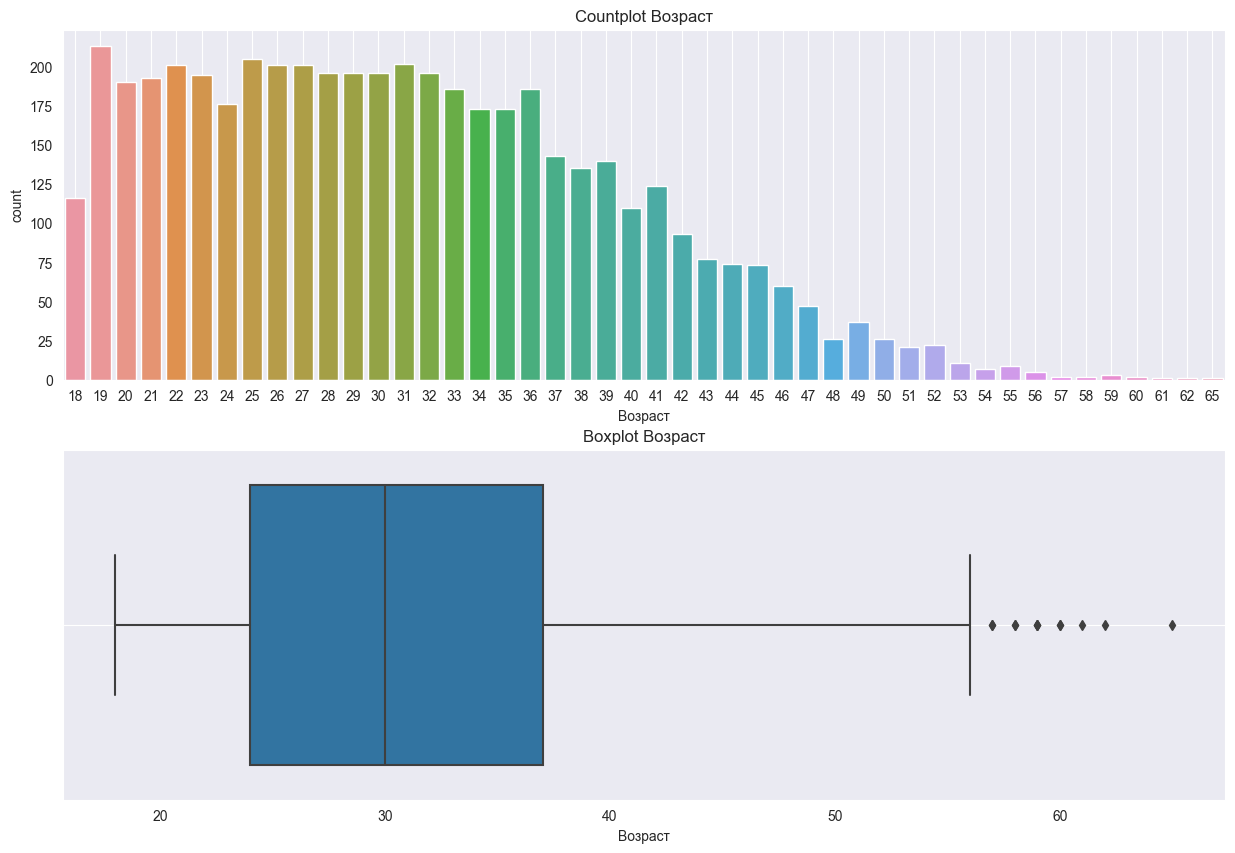

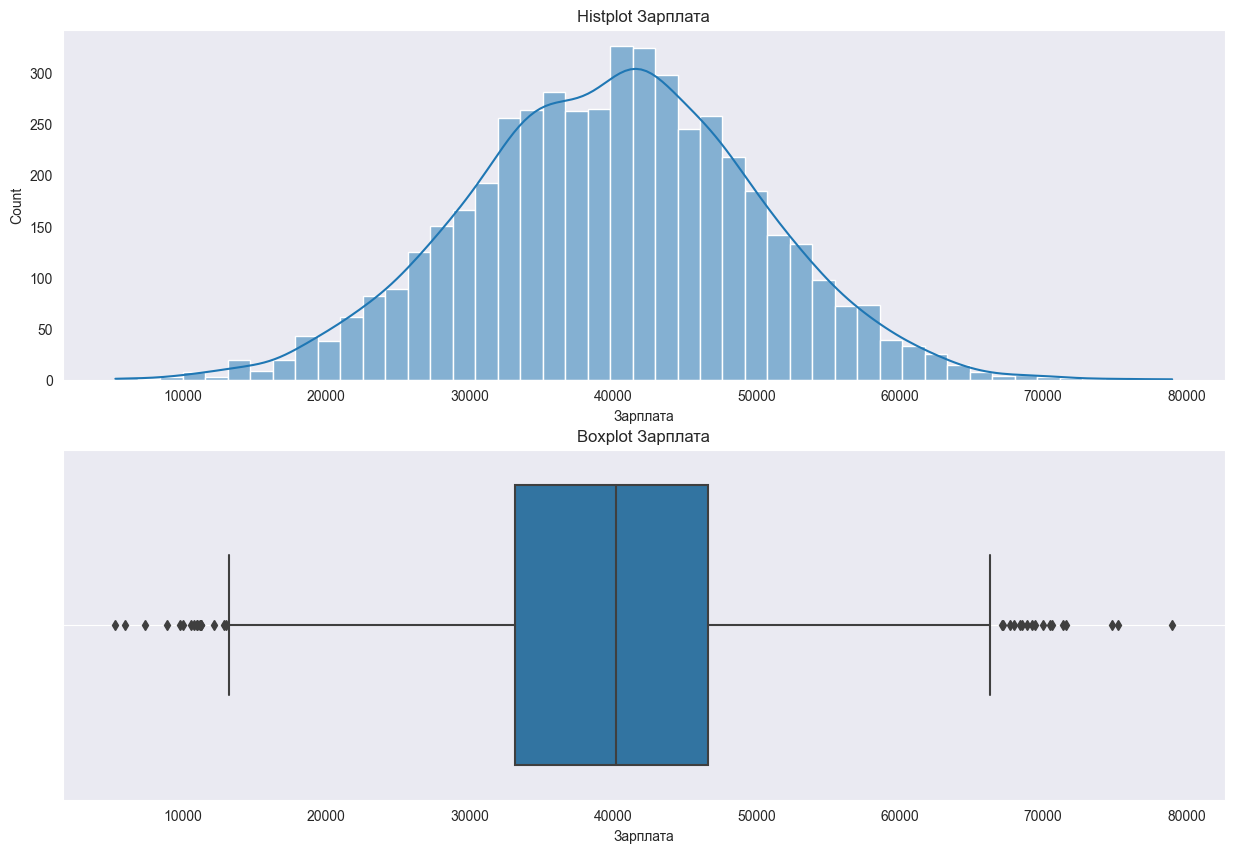

             count  percent
Члены семьи                
1             1748    36.06
0             1461    30.14
2             1038    21.42
3              437     9.02
4              124     2.56
5               32     0.66
6                7     0.14


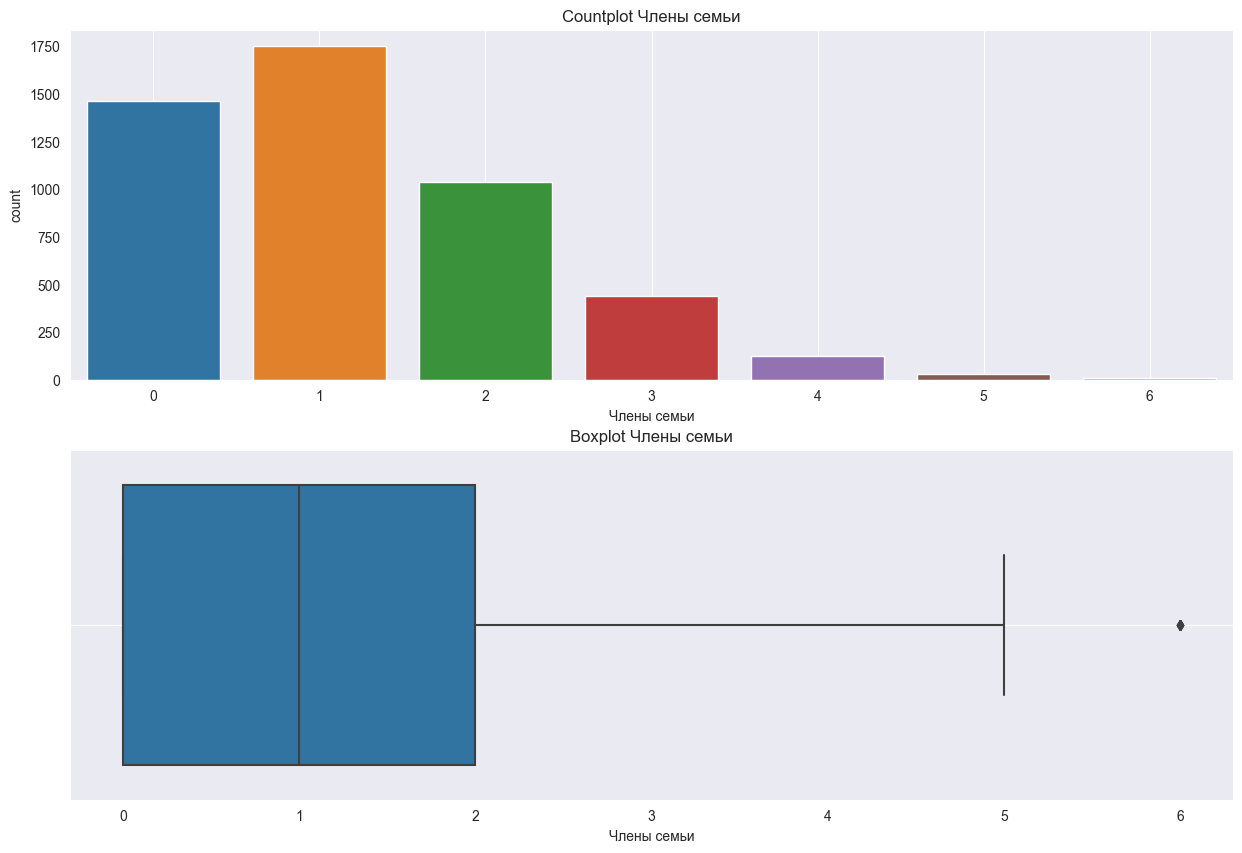

                   count  percent
Страховые выплаты                
0                   4284    88.38
1                    423     8.73
2                    114     2.35
3                     18     0.37
4                      7     0.14
5                      1     0.02


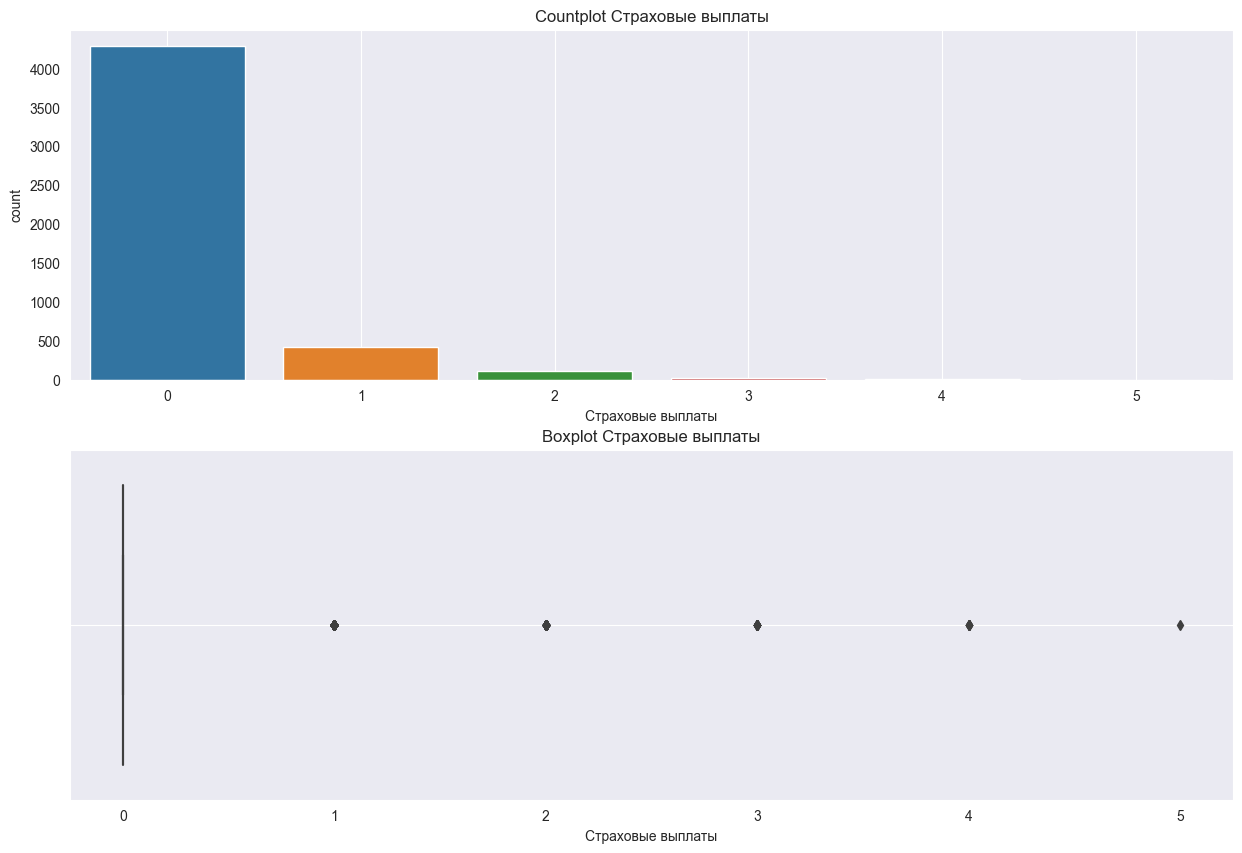

In [171]:
continuous_col = ['Зарплата']
discrete_col = ['Пол', 'Возраст','Члены семьи', 'Страховые выплаты']

for col in data.columns:

    plt.figure(figsize=(15,10))
    plt.subplot(2,1,1)
    if col in continuous_col:
        sns.histplot(data=data[col], kde=True)
        plt.grid()
        plt.title('Histplot '+col)
    else:
        print(data.groupby(col)[col].agg(['count']).assign(percent=lambda x: x / x.sum() * 100).
                                    sort_values('count', ascending=False)[:10])
        sns.countplot(data=data, x=col)
        plt.grid()
        plt.title('Countplot '+col)
    
    plt.subplot(2,1,2)
    sns.boxplot(data=data, x=col)
    plt.grid()
    plt.title('Boxplot '+col)
    plt.show()

In [172]:
data.groupby('Страховые выплаты')['Возраст'].agg(['mean', 'count'])

,mean,count
Страховые выплаты,,
0,28.99,4284
1,44.71,423
2,50.87,114
3,55.83,18
4,60.00,7
5,65.00,1


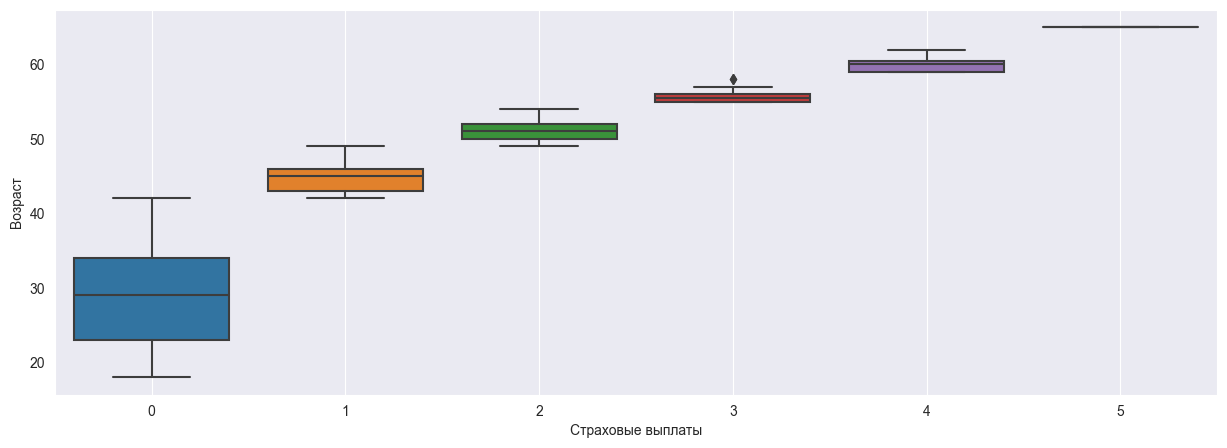

In [173]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='Страховые выплаты', y='Возраст'),
plt.grid()

После прочтения данных было выявлено, что в датасете содержится 5000 записей, пропусков в данных нет.<br/>
Однако, имеются дублирующиеся записи, которые были исключены из исследования. Все признаки являютя целочисленными признаки 'Возраст' и 'Зарплата' приведены к целочисленным, и уменьшена разнерность хранения данных. Это привело к сокращению требуемой памяти датасета в 2,5 раза.<br/>

- В датасете примерно одинаковое количество мужщин и женщин.<br/>
- Возраст клиентов составляет от 18 до 65 лет, средний возраст - 31 год. Количество клиентов от 19 до 32 лет примерно одинаковое для каждого возраста и составляет около 200 клиентов, в дальнейшем с увеличением возраста, количество клиентов уменьшается.<br/>
- Распределение зарплат клиентов приближенно соответствует нормальному, средняя зарплата ококло 40 тыс. руб.<br/>
- В основном клиенты имеют одного члена семьи, несколько ниже количество клиентов без семей и с двумя членами семьи.<br/>
- 88% клиентов не обращались за страховыми выплатами. Клиенты, обратившиеся за выплатами более 2-х раз единичны. <br/>
- Страховые выплаты имеют тенденцию выплачиваться начиная с возраста клиентов - от 45 лет.

### Зависимость целевого признака

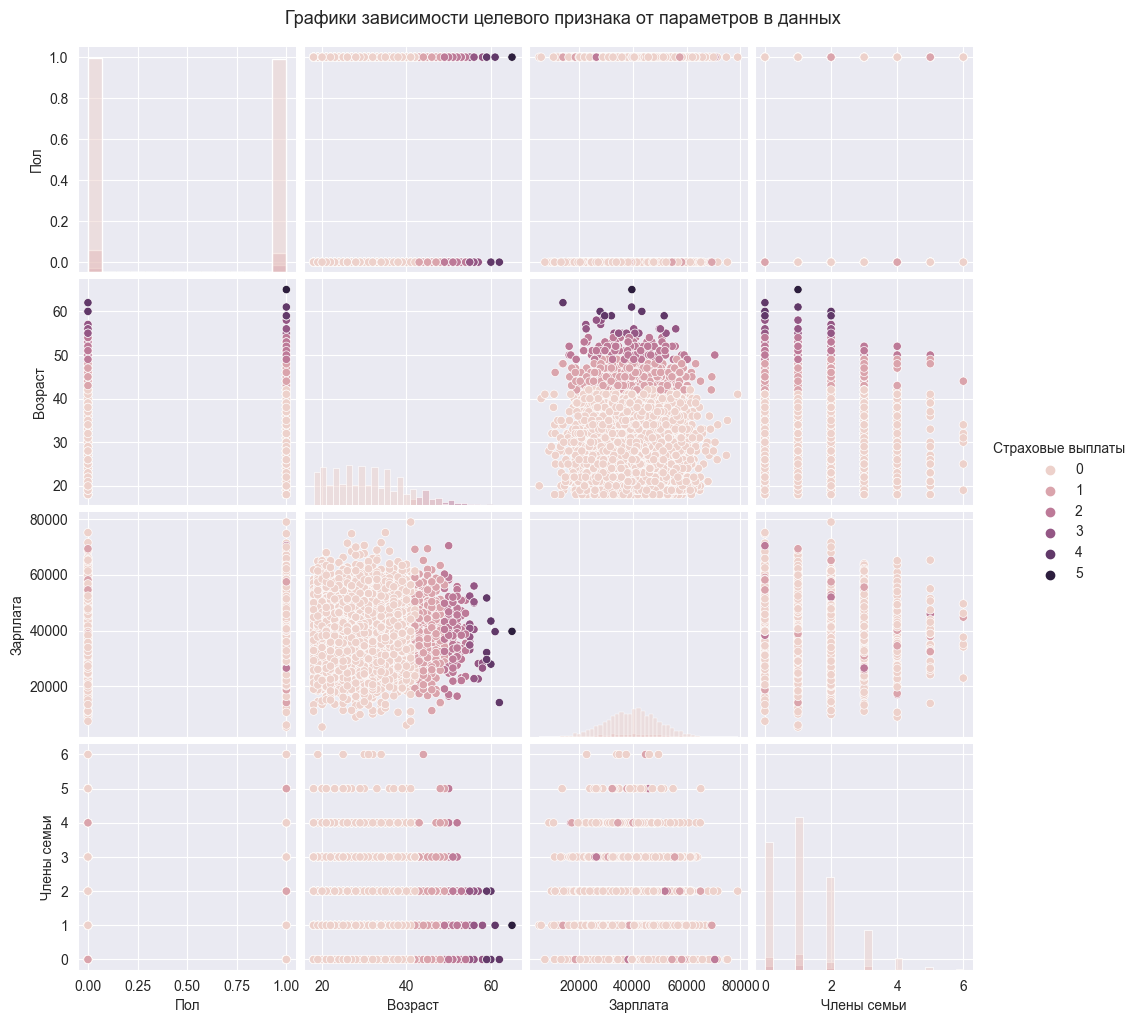

In [174]:
sns.set_style('darkgrid')
sns.pairplot(data, hue='Страховые выплаты', height=2.5, diag_kind='hist')
plt.suptitle("Графики зависимости целевого признака от параметров в данных", y=1.02, fontsize=13)
plt.show()

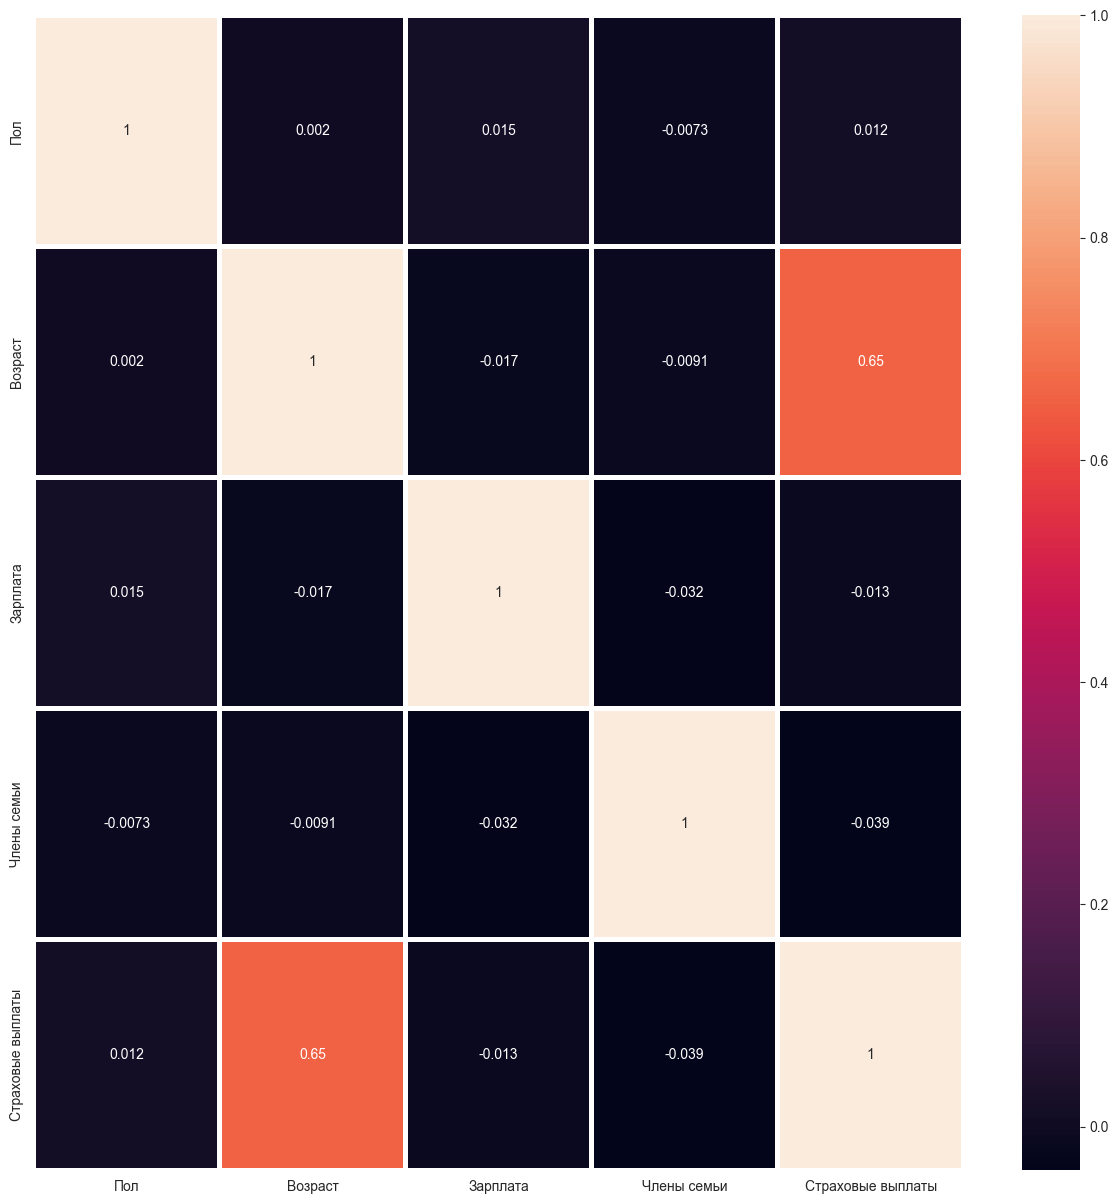

In [175]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)
sns.heatmap(data.corr(), annot=True, linewidths=3, linecolor='white')
plt.show()

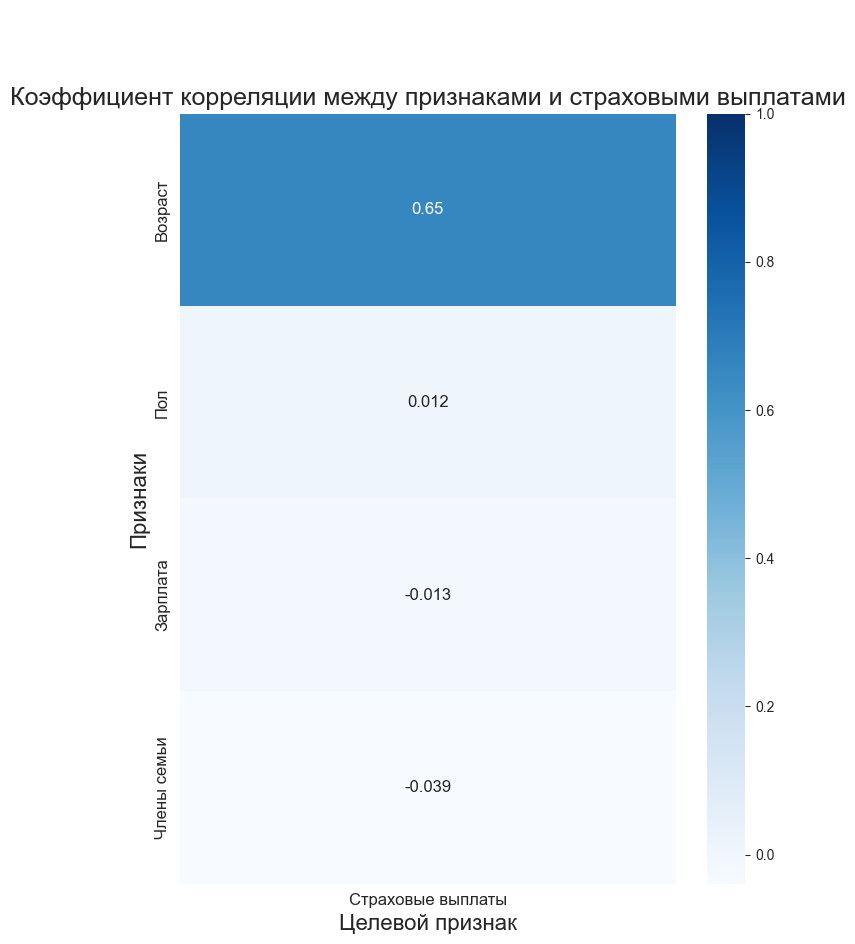

In [176]:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(data.corr()[['Страховые выплаты']].sort_values('Страховые выплаты', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Коэффициент корреляции между признаками и страховыми выплатами', fontsize=18)
ax.set_xlabel('Целевой признак', fontsize = 16)
ax.set_ylabel('Признаки', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1)
plt.show()

### Выделение целевого признака

In [177]:
X = data.drop(['Страховые выплаты'],axis=1)
y = data['Страховые выплаты']

### Определение тренировочной выборки

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=RANDOM_STATE)
print('Размер тренировочной выборки - {:.0%}'.format(X_train.shape[0]/X.shape[0]))
print('Размер тестовой выборки - {:.0%}'.format(X_test.shape[0]/y.shape[0]))

Размер тренировочной выборки - 75%
Размер тестовой выборки - 25%


Произведена загрузка данных, просмотр сведений показал отсутствие пропусков, при существовании дубликатов. Сформирована тренировочная и тестовая выборки, согласно принципу 75:25.<br/>
Наиболее коррелирующим с количеством страховых выплат признаком является возраст клиента. Корреляция положительная, с увеличением возраста количество выплат увеличивается. Остальные признаки слабо скоррелированы с целевым признаком. Корреляция признаков между собой также слабая.

Для нашего проекта мультиколлинеарность интересна потому что:
- мультиколлиниарность проблема линейных моделей. "Деревянные" модели (RF, DT) устойчивы к мультиколлинеарности, а кластеризация тоже почти не зависит от линейных зависимостей. 
- существует один аспект - как мы находим параметры модели. Найти можно оптимизационно (99% задач в машинном обучении, это когда мы перебираем параметры, в поисках таких, при которых ошибка минимальная) или аналитически (как в этом проекте - мы решаем по формуле, напрямую). Так вот, когда мы решаем задачу оптимизационо, мультиколлинеарность не вызывает переобучение, потому что есть регуляризация при переборе параметров, а когда мы решаем аналитически проблема переобучения существует. 

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** Не изменится

Заменим матрицу $X$ на матрицу $Z$:

$$
Z = XP \qquad (2.1)   
$$

где $P$ - обратимая матрица с некими значениями, на которую может быть умножена матрица $X$.

**Обоснование:** 

Подставим новое значение $Z$ в формулу $w_P$ и произведем преобразования:

$$
w_P = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T XP)^{-1} P^T X^T y = (P^T(X^T X)P)^{-1} P^T X^T y = P^{-1}(X^T X)^{-1}(P^T)^{-1}P^T X^T y  \qquad (2.2) 
$$

Так как по $P$ по условию обратимая, то произведение $(P^T)^{-1}P^T$ равно $E$ (единичная матрица):

$$
w_P = P^{-1}(X^T X)^{-1}E X^T y = P^{-1}(X^T X)^{-1} X^T y \qquad (2.3)
$$

Выражение $(X^T X)^{-1} X^T y$ равно $w$:

$$
w_P = P^{-1}(X^T X)^{-1} X^T y = P^{-1}w \qquad (2.4)
$$

Подставим новое значение весов w_P в формулу для предсказаний линейной регрессии. Предсказания модели расчитываются по формуле:

$$
a = Xw \qquad (2.5)
$$

Подставим в эту формулу значения $Z$ $w_P$ для того, чтобы на их основе вычислить предсказание модели а_1:

$$
a_1 = Z w_P = XPP^{-1}w \qquad (2.6)
$$

Так как $P$ по условию обратимая, то произведение PP^{-1} равно $E$:

$$
a_1 = XPP^{-1}w = XEw = Xw = a \qquad (2.7)
$$

Таким образом, предсказания $a_1$ для матрицы признаков, умноженной на обратимую матрицу $P$ равны предсказаниям $a$.
Параметры линейной регресии в исходной задаче $w$ и в преобразованной $w_P$ связаны следующим образом:

$$
w_1 = P^{-1}w \qquad (2.8)
$$


Таким образом, умножение исходных признаков на обратимую матрицу не изменит предсказания модели.


Существует также второй способ доказательства - он очень короткий   
        
Для исходных данных мы решаем эту задачу обучения:
    
$$
w = \arg\min_w MSE(Xw, y)
$$
    
  
Для преобразованных данных решаем такую задачу обучения: 
    
$$
w_P = \arg\min_w MSE(XPw_p, y)
$$  
    
    
Если сделать замену   $w_p$ на $P^{-1}w$ и подставим:    
    
$$
\arg\min_w MSE(XPP^{-1}w, y)
$$
    
После сокращения получим: 
  
    
$$
\arg\min_w MSE(Xw, y)
$$    

       
Выходит, что если заменить $w_p$ на $P^{-1}w$, то получаем ту же самую постановку задачи!  
     
    
</div>


Создадим модель по исходным формулам для предсказания значений по неизменённым признакам.

In [179]:
class LinearRegress:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [180]:
model = LinearRegress()
model.fit(X_train, y_train)
predict = model.predict(X_test)

R2_score = r2_score(y_test, predict)
MSE = mean_squared_error(predict,y_test)

print("R2:", R2_score.round(2))
print("MSE:", MSE.round(2))

R2: 0.42
MSE: 0.12


Вычислим значения R2 и MSE для предсказанных значений по неизменённым данным.

In [181]:
model_l = LinearRegression()
model_l.fit(X_train,y_train)
predictions= model_l.predict(X_test)

R2_score_l = r2_score(y_test, predictions)
MSE_l = mean_squared_error(predictions,y_test)

print("R2 Линейной регрессии неизменённой матрицы:", R2_score_l.round(2))
print("MSE Линейной регрессии неизменённой матрицы:", MSE_l.round(2))

R2 Линейной регрессии неизменённой матрицы: 0.42
MSE Линейной регрессии неизменённой матрицы: 0.12


Построим график зависимости значений истинные/предсказанные модели линейной регрессии из Scikit-learn

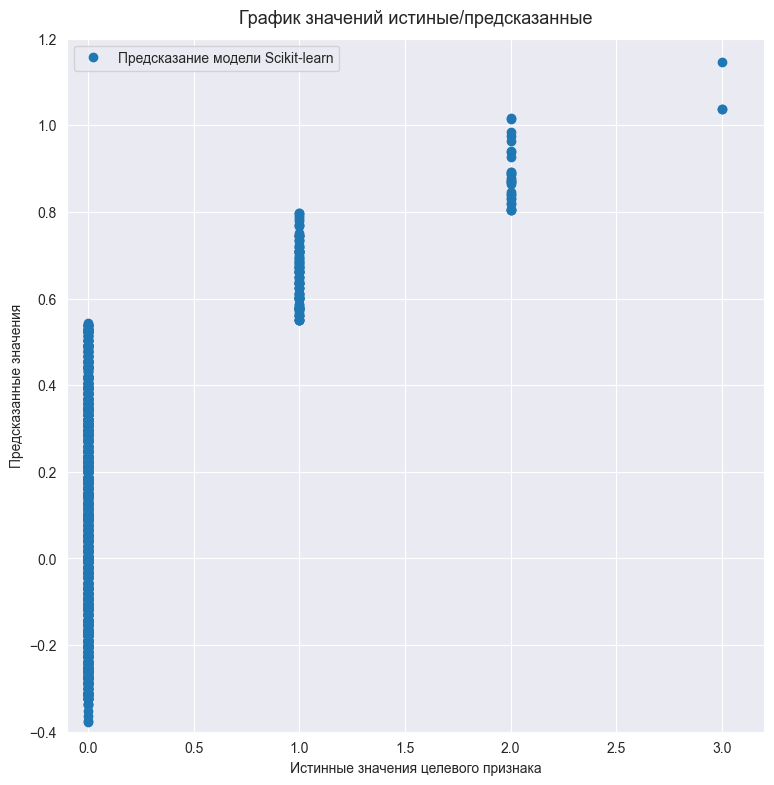

In [182]:
plt.figure(figsize=(9,9))
plt.plot(y_test,predictions,'o',alpha=1)
plt.legend(['Предсказание модели Scikit-learn'])
plt.xlim(-0.1,3.2)
plt.ylim(-0.4,1.2)
plt.title('График значений истиные/предсказанные', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

Произведём изменение признаков исходной матрицы данных методом умножения их на произвольную обратимую матрицу.<br/>
Создадим произвольную матрицу по длине совпадающую с шириной нашей выборки.

In [183]:
matrix = np.random.normal(3, size=(4,4))
matrix

array([[2.81730626, 1.41515888, 3.92234921, 3.44673808],
       [2.16514393, 3.52087207, 3.16358748, 3.07941967],
       [1.8790901 , 2.13231238, 3.2192594 , 3.2382999 ],
       [4.80460892, 2.57793694, 3.41290881, 2.97635352]])

Проверим обратимость матрицы matrix.

In [184]:
np.linalg.inv(matrix)

array([[-0.34488868, -0.38959124,  0.31072179,  0.46440906],
       [-0.08022668,  0.64795401, -0.47715866, -0.05833283],
       [ 2.44681499,  1.758527  , -3.48068967, -0.86591059],
       [-2.17947291, -1.94877501,  3.90291832,  0.62974655]])

Произведём умножение признаков на произвольную матрицу.<br/>

Обучающая выборка

In [185]:
train_matrix = X_train.dot(matrix)
train_matrix.columns = X_train.columns
train_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
4599,102480.64,116314.76,175545.04,176579.52
3882,95359.77,108246.02,163344.00,164305.25
4705,52671.29,59791.83,90218.60,90749.28
1400,73010.46,82899.20,125055.95,125790.77
728,61161.84,69443.57,104755.89,105370.90


Тестовая выборка

In [186]:
test_matrix = X_test.dot(matrix)
test_matrix.columns = X_test.columns
test_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
1335,88745.67,100727.54,152025.73,152922.03
3875,123904.14,140633.47,212254.35,213505.95
166,63785.03,72408.15,109248.04,109889.39
3003,36360.49,41296.10,62261.91,62625.24
424,51784.18,58805.71,88681.98,89200.85


Проверим результат. Вычислим значения R2 и MSE для предсказанных значений по изменённым данным.

In [187]:
model_matrix = LinearRegression()
model_matrix.fit(train_matrix,y_train)
predictions_matrix= model_matrix.predict(test_matrix)
print("R2_score Линейной регрессии изменённой матрицы:", r2_score(y_test,predictions_matrix).round(2))
print("MSE Линейной регрессии изменённой матрицы:", mean_squared_error(predictions_matrix,y_test).round(2))

R2_score Линейной регрессии изменённой матрицы: 0.42
MSE Линейной регрессии изменённой матрицы: 0.12


Нанесём на график зависимости значений истинные/предсказанные модели линейной регрессии предсказанные значения модели на изменённых данных

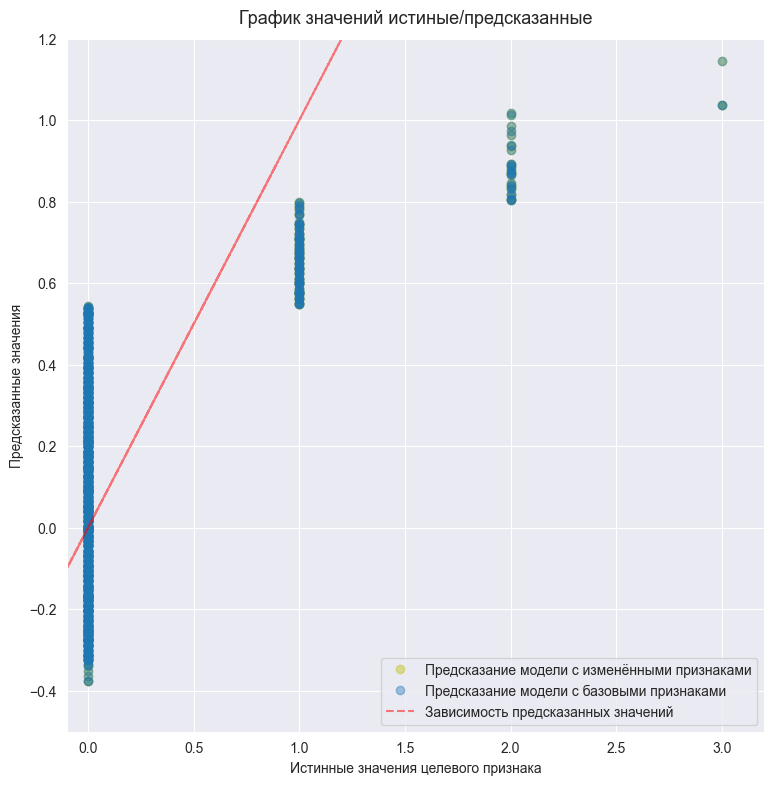

In [188]:
plt.figure(figsize=(9,9))
plt.plot(y_test,predictions_matrix,'yo',alpha=0.4)
plt.plot(y_test,predictions,'o',alpha=0.4)
plt.plot(predictions_matrix,predictions,'r--',alpha=0.5)
plt.legend(['Предсказание модели c изменёнными признаками', 'Предсказание модели c базовыми признаками', 'Зависимость предсказанных значений'])

plt.xlim(-0.1,3.2)
plt.ylim(-0.5,1.2)
plt.title('График значений истиные/предсказанные', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

**Вывод**

Если признаки исходных данных умножить на обратимую матрицу, то качество линейной регрессии не изменится.<br/>

Изменение качества предсказания линейной регрессии не происходит при умножении признаков исходных данных на обратимую матрицу, так как параметры линейной регрессии в исходной задаче и в преобразованной связаны между собой алгоритмом преобразования признаков. <br/>
Результатом работы которого является предсказание, которое вычисляется методом умножения признаков исходных данных на вектор по длине равный ширине таблицы признаков, который в свою очередь умножается на целевые признаки. По результату скалярного умножения создаётся число, на которое умножается тестовая выборка, и если эта выборка была преобразована умножением на ту же матрицу, то качество предсказания не изменится.<br/>

Таким образом, если изменить исходные данные методом умножения признаков на обратимую матрицу, не изменяя значений целевого признака, качество предсказания модели не изменится.

## Алгоритм преобразования

**Алгоритм**

Для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии будем умножать матрицу признаков на обратимую матрицу , которая будет генерироваться случайным образом.

Этапы:
1. Генерируем рандомную матрицу пока не получим обратимую и наш код гарантированно полностью отработает
2. Создаём новую зашифрованную матрицу данных 
3. Ищем метрики качества **r2** и **MSE** на исходных данных и на зашифрованных
4. Вывод полученных результатов

**Обоснование**

Рандомная матрица должна иметь необходимую размерность (m x n), где n - количество признаков для регрессии. Таким образом новая зашифрованная матрица будет иметь ту же размерность, что и матрица X. Обратная матрица существует только для квадратных невырожденных матриц (определитель которых не равен нулю).<br/>
Это значит, что если мы произведём умножение признаков тренировочной и тестовой выборок на одну и ту же обратимую матрицу, то результатом предсказания будет произведение нашей изменённой таблицы с признаками на вектор, который был получен из той же таблицы с изменёнными данными увеличенную на ту же величину, что и признаки тренировочных данных. <br/>
Проверим работу данного алгоритма в следующей главе.<br/>



## Проверка алгоритма

**Реализация pipeline**

Создаем класс MatrixTransformer(BaseEstimator, TransformerMixin), который будет сохранять имена колонок и генерировать матрицу преобразования. <br/>



In [189]:
class MatrixTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, variables):
        """В конструкторе сохраним имена колонок и сгененрируем матрицу преобразования"""
        self.variables = variables
        size = len(variables)
        rng = np.random.default_rng(seed=RANDOM_STATE)
        self.M = rng.normal(size=(size, size))

    def fit(self, X, y):
        return self

    def transform(self, X):
        X_train = X.drop(self.variables, axis=1)
        X_train[self.variables] = X[self.variables] @ self.M
        return X_train  

In [190]:
pipe = Pipeline([
        ('transformer', MatrixTransformer(X.columns)),
        ('model', LinearRegression()),
])

pipe.fit(X_train, y_train)
    
pipe.predict(X_test)

R2_LR_crypted_data = r2_score(y_test, pipe.predict(X_test))
MSE_LR_crypted_data = mean_squared_error(pipe.predict(X_test), y_test)

print("R2_score Линейной регрессии изменённой матрицы:", R2_LR_crypted_data.round(2))
print("MSE Линейной регрессии изменённой матрицы:", MSE_LR_crypted_data.round(2))

R2_score Линейной регрессии изменённой матрицы: 0.42
MSE Линейной регрессии изменённой матрицы: 0.12


Изобразим на графике предсказанные значения относительно истинных значений целевого столбца и сравним эти значения с предсказаниями модели по неизменённым признакам.

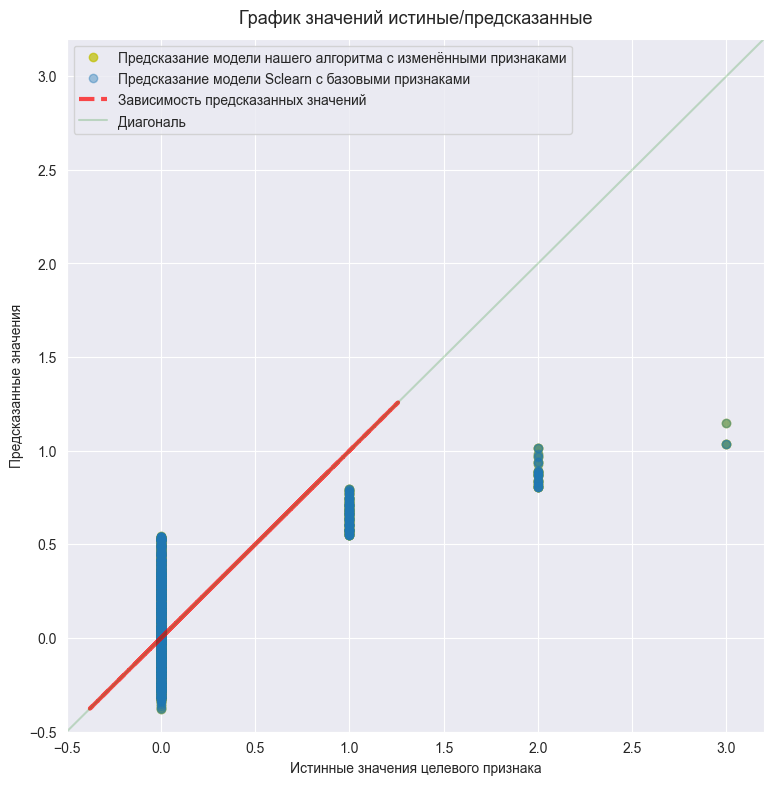

In [191]:
plt.figure(figsize=(9,9))
plt.plot(y_test,pipe.predict(X_test),'yo',alpha=0.7)
plt.plot(y_test,predictions,'o',alpha=0.4)
plt.plot(pipe.predict(X_test),predictions,'r--',alpha=0.7,linewidth = 3)
plt.plot([-0.5,3.2],[-0.5,3.2],linestyle='-',color='g',alpha=0.2)
plt.legend(['Предсказание модели нашего алгоритма c изменёнными признаками', 'Предсказание модели Sclearn c базовыми признаками','Зависимость предсказанных значений','Диагональ'])

plt.xlim(-0.5,3.2)
plt.ylim(-0.5,3.2)
plt.title('График значений истиные/предсказанные', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

Сравнение R2 и MSE преобразованной/непреобразованной матрицы признаков.

In [192]:
comparison = pd.DataFrame(index=['R2_score','MSE'], columns=['Преобразованная матрица','Непреобразованная матрица'])
comparison['Преобразованная матрица'] = R2_LR_crypted_data, MSE_LR_crypted_data
comparison['Непреобразованная матрица'] = R2_score_l, MSE_l

comparison.T

,R2_score,MSE
Преобразованная матрица,0.42,0.12
Непреобразованная матрица,0.42,0.12


**Вывод**

В ходе работы проделаны следующие этапы:

1. Загружены и изучены данные.
2. Качество линейной регресии не изменилось от использования исодной матрици и исходной матрицы, умноженную на обратимую.
3. Создан алгоритм преобразования данных.
4. Исследован алгоритм преобразования данных и проверена метрика R2 для данных без преобразования и с ним.

По результатам работы использования матричных операций можно увидеть, что персональные данные можно зашифровать от распознования. Данные клиентов страховой компании «Хоть потоп» можно хранить в преобразованном виде, чтобы по ним было сложно восстановить персональную информацию.<br/>

Преобразование произведено таким образом, чтобы в результате работы предлагаемого алгоритма качество моделей машинного обучения не ухудшилось.<br/>

В результате исследования для страховой компании был разработан алгоритм, где данные были преобразованы методом умножения признаков исходных данных на обратимую матрицу. Результатом такого преобразования является новая (преобразованная) матрица признаков, которая справилась с основными задачами по шифрованию данных. <br/>

При сравнении качество предсказаний модели с преобразованной/непреобразованной матрицей признаков сохранило значения метрик r2 и MSE неизменными.